## Retail Analysis with Walmart Data

In [735]:
# import required libraries
import pandas as pd
import numpy as np 
from numpy import linspace
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt



%matplotlib inline 


In [736]:
# Import dataset 
sales_df = pd.read_csv('Walmart_Store_sales.csv')
sales_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [737]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [738]:
sales_df['Date'].describe()

count           6435
unique           143
top       05-02-2010
freq              45
Name: Date, dtype: object

### Part One : Basic Statistics tasks
#### (1) Which store has maximum sales

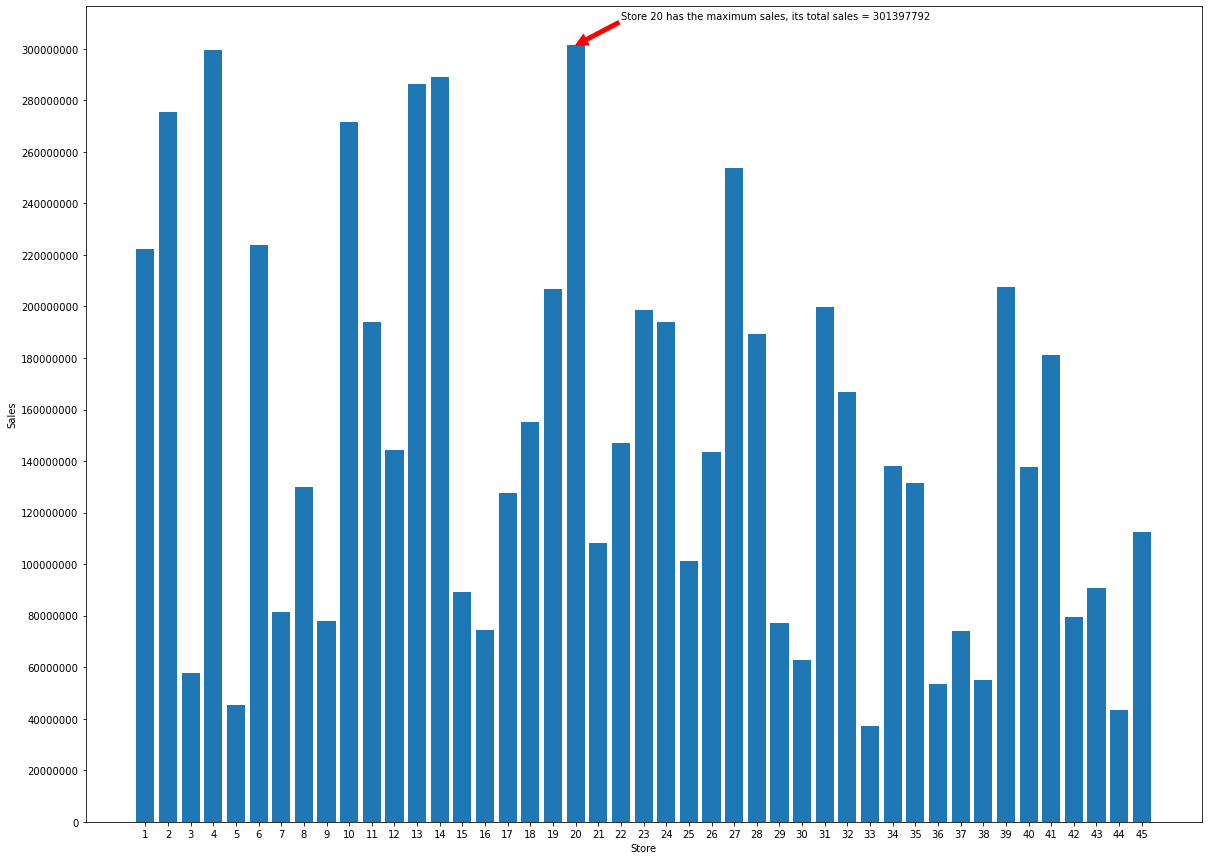

In [739]:

# sum all sales for each store
stores_sales = sales_df[['Store', 'Weekly_Sales']].groupby(['Store']).sum([
    'Weekly_Sales'])
stores_sales.reset_index(inplace=True)

# convert dataframe to numpy array
X_stores = stores_sales['Store'].to_numpy()
Y_sales = stores_sales['Weekly_Sales'].to_numpy()

# start drawing histogram to visual data easily
plt.figure(figsize=(20, 15))
plt.bar(X_stores, Y_sales)
plt.xticks(X_stores)
plt.yticks(range(0, (Y_sales.max().astype(int)), 20000000))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel('Store')
plt.ylabel('Sales')

max_sale = Y_sales.max().astype(int)
store_with_max_sale = X_stores[Y_sales.argmax()].astype(int)

# show the highest
plt.annotate(f'Store {store_with_max_sale} has the maximum sales, its total sales = {max_sale}',
             xytext=(store_with_max_sale+2,
                     max_sale+10000000),
             xy=(store_with_max_sale, max_sale),
             arrowprops=dict(color='r', shrink=1, lw=1))
plt.show()


#### (2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [740]:
# Standard daviation of sales
sales_std = sales_df[['Store', 'Weekly_Sales']].groupby('Store').std()
sales_std.reset_index(inplace=True)
sales_std = sales_std.rename(columns={'Weekly_Sales':'Sales Standard Deviation'})
# 1 - Store , 2 - Store slae's standard daviation
max_std = [sales_std['Store'][sales_std['Sales Standard Deviation'].argmax()]
, float(sales_std['Sales Standard Deviation'].max())]

print(f'Store {max_std[0]} has the maximum standard deviation the equals {max_std[1]:.2f} $\n')


Store 14 has the maximum standard deviation the equals 317569.95 $



In [741]:
# coefficient of mean to standard deviation  |  formula = (Standard Deviation / Mean) * 100
sales_mean = sales_df[['Store', 'Weekly_Sales']].groupby('Store').mean()
sales_mean = sales_mean.rename(columns={'Weekly_Sales':"Sale's Mean"})

Coef_of_mean_to_std = (sales_std['Sales Standard Deviation'].sum()/sales_mean["Sale's Mean"].sum())*100
print(f'Coefficient of mean to standard deviation is {Coef_of_mean_to_std}')

Coefficient of mean to standard deviation is 13.523458876035269


#### (3) Which store/s has good quarterly growth rate in Q3’2012

In [742]:
# Create dataframe for Q3'2012, from date 01-07-2012 to date 30-09-2012
Q3_df = sales_df[['Store','Weekly_Sales','Date']]
Q3_df['Date'] = pd.to_datetime(Q3_df['Date'])
Q3_df

/var/folders/1l/mm09ww0d21v9yjlsv7h5r3q00000gn/T/ipykernel_98056/1550168256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3_df['Date'] = pd.to_datetime(Q3_df['Date'])


,Store,Weekly_Sales,Date
0,1,1643690.90,2010-05-02
1,1,1641957.44,2010-12-02
2,1,1611968.17,2010-02-19
3,1,1409727.59,2010-02-26
4,1,1554806.68,2010-05-03
...,...,...,...
6430,45,713173.95,2012-09-28
6431,45,733455.07,2012-05-10
6432,45,734464.36,2012-12-10
6433,45,718125.53,2012-10-19


In [743]:
Q3_df = Q3_df.loc[(Q3_df['Date'] >= pd.to_datetime("2012-07-01")) & (Q3_df['Date'] <= pd.to_datetime("2012-09-30"))]
Q3_df = Q3_df.groupby(['Store']).sum()['Weekly_Sales']
print(f"Store {Q3_df.idxmax()} has good quartly growth in Q3'2012 with {Q3_df.max()} $")

Store 4 has good quartly growth in Q3'2012 with 25652119.35 $


#### (4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [744]:
non_Holidays_Mean_Sales = sales_df.loc[(sales_df['Holiday_Flag']==0)].mean()['Weekly_Sales']
non_Holidays_Mean_Sales

/var/folders/1l/mm09ww0d21v9yjlsv7h5r3q00000gn/T/ipykernel_98056/3478954610.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_Holidays_Mean_Sales = sales_df.loc[(sales_df['Holiday_Flag']==0)].mean()['Weekly_Sales']


1041256.3802088564

In [745]:
Holidays_sales = sales_df[['Weekly_Sales','Date']].loc[(sales_df['Holiday_Flag']==1)].groupby('Date').sum()['Weekly_Sales']
print(f'Holidays that have sales higher than mean sales of non-Holidaya is {Holidays_sales>non_Holidays_Mean_Sales}')

Holidays that have sales higher than mean sales of non-Holidaya is Date
07-09-2012    True
09-09-2011    True
10-02-2012    True
10-09-2010    True
11-02-2011    True
12-02-2010    True
25-11-2011    True
26-11-2010    True
30-12-2011    True
31-12-2010    True
Name: Weekly_Sales, dtype: bool


#### (5) Provide a monthly and semester view of sales in units and give insights

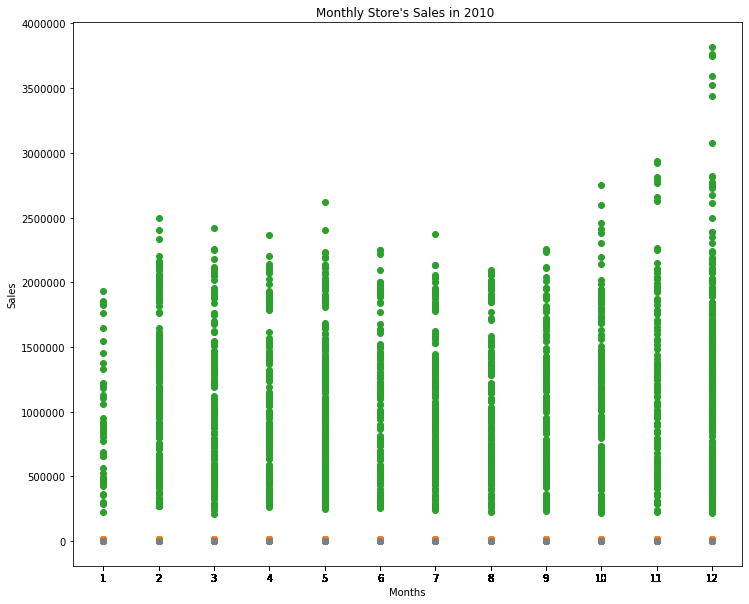

In [746]:
# Monthly Sales for each year

sales_df['Date'] = pd.to_datetime(sales_df['Date'])
# 2010
sales_2010 = sales_df[ (sales_df['Date'].dt.year == 2010) ]
monthly_2010 = sales_2010.groupby(sales_2010['Date'].dt.month).sum()['Weekly_Sales']
# Satrt draw the graph
plt.figure(figsize=(12, 10))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(sales_2010['Date'].dt.month, sales_2010, 'o')
plt.xticks(sales_2010['Date'].dt.month)
plt.title('Monthly Store\'s Sales in 2010 ')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()


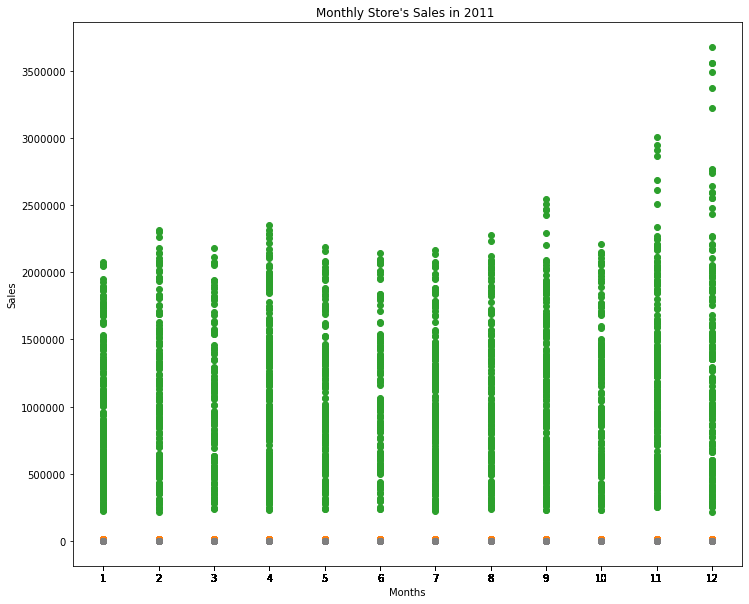

In [747]:
# 2011
sales_2011 = sales_df[ (sales_df['Date'].dt.year == 2011) ]
monthly_2012 = sales_2011.groupby(sales_2011['Date'].dt.month).sum()['Weekly_Sales']
# Satrt draw the graph
plt.figure(figsize=(12, 10))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(sales_2011['Date'].dt.month, sales_2011, 'o')
plt.xticks(sales_2011['Date'].dt.month)
plt.title('Monthly Store\'s Sales in 2011 ')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

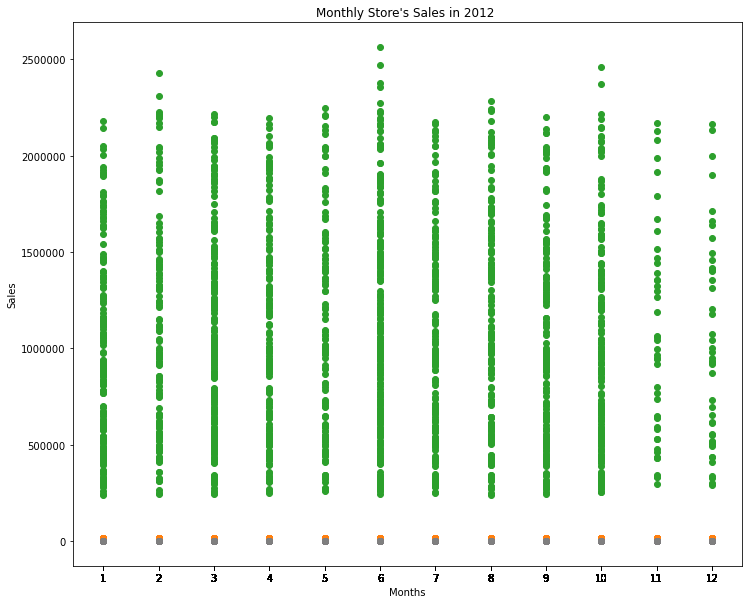

In [748]:
# 2012
sales_2012 = sales_df[ (sales_df['Date'].dt.year == 2012) ]
monthly_2012 = sales_2012.groupby(sales_2012['Date'].dt.month).sum()['Weekly_Sales']
# Satrt draw the graph
plt.figure(figsize=(12, 10))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(sales_2012['Date'].dt.month, sales_2012, 'o')
plt.xticks(sales_2012['Date'].dt.month)
plt.title('Monthly Store\'s Sales in 2012 ')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()


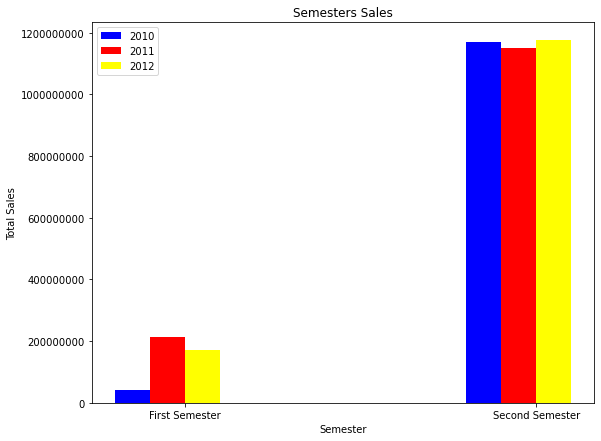

In [749]:
# Compare for all years by semester - '6-months'
semesters_2010 = (sales_2010.resample('6M', on='Date').sum()['Weekly_Sales']).reset_index().drop(2)
semesters_2011 = (sales_2011.resample('6M', on='Date').sum()['Weekly_Sales']).reset_index().drop(2)
semesters_2012 = (sales_2012.resample('6M', on='Date').sum()['Weekly_Sales']).reset_index().drop(2)

SemestersLabels = pd.Series(['First Semester','Second Semester'])
x = np.arange(len(SemestersLabels))

width = 0.1

fig, ax = plt.subplots(figsize=(9, 7))

ax.bar(x - 3*width/2, semesters_2010['Weekly_Sales'], width, label='2010', color='b')
ax.bar(x - width/2, semesters_2011['Weekly_Sales'], width, label='2011', color='r')
ax.bar(x + width/2, semesters_2012['Weekly_Sales'], width, label='2012', color='yellow')
ax.set_xticks(x)
ax.set_xticklabels(tuple(SemestersLabels))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Semesters Sales')
plt.xlabel('Semester')
plt.ylabel('Total Sales')
ax.legend()
plt.show()

## Part Two : Statistical Model
### (1) For Store 1 – Build  prediction models to forecast demand
##### - Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.


In [756]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = sales_df[['CPI','Unemployment','Fuel_Price']].loc[ (sales_df['Store']==1) ]
Y = sales_df[['Weekly_Sales']].loc[ (sales_df['Store']==1) ]

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# train model
LinReg = LinearRegression()
LinReg.fit(X_train, Y_train)

print(f'Intercept = {LinReg.intercept_} \nCoefficient = {len(LinReg.coef_)}')

print(f'Mean Squared Error = {np.mean((LinReg.predict(X_test)-Y_test)**2)}'
      + f'\nVariance Score = {LinReg.score(X_test,Y_test)}')
      
# claculate MSE using sklearn library
from sklearn import metrics
print(f'Mean Squared Error = {np.sqrt(metrics.mean_squared_error(LinReg.predict(X_test),Y_test))}')


Intercept = [-4477426.70754994] 
Coefficient = 1
Mean Squared Error = Weekly_Sales    1.758705e+10
dtype: float64
Variance Score = -0.005470324917370206
Mean Squared Error = 132616.19021713


#### - Change dates into days by creating new variable.


In [751]:
sales_df['Day'] = pd.to_datetime(sales_df['Date']).dt.day_name()
sales_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Friday
